# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [72]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import datetime as dt
from api_keys import weather_api_key
import scipy.stats as st
from scipy.stats import linregress

In [73]:
# Getting the current date (to include it in graph labels)
Date = dt.datetime.today().strftime("%d/%m/%Y")
Date

'25/04/2022'

In [74]:
#Import City Data
city_data = "worldcities.csv"
city_data_path = "city_data/worldcities.csv"
city_data = pd.read_csv(city_data_path)

# Set URL base variables
url = "https://api.openweathermap.org/data/2.5/weather?"
weather_api_key = weather_api_key
units = "metric"

# build partial url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
# Create a sample of 1000 cities (random) to create a pool of the 46,832 cities
city_data_sample = city_data.sample(1000)
cities = city_data_sample["City"]

# set up lists to hold reponse info
city_name = []
country = []
latitude = []
longitude = []
current_temp = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
foundcitycount = []

# Loop through the list of cities and perform a request for data on each
foundcitycount = 0

for city in cities:
    response = requests.get(query_url + city).json()
        
    if foundcitycount <500:
       
    # try and get all the inforamtion if city is in the list - add calculation to convert windspeed from mps to kmh.
        try:
            city_name.append(response['name'])
            country.append(response['sys']['country'])
            latitude.append(response['coord']['lat'])
            longitude.append(response['coord']['lon'])
            current_temp.append(response['main']['temp'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            windspeed.append(response['wind']['speed'] * 3.6)

            # Print the detail into e various lists 
            print(f"Success! {city} was found - information added")

            # Add a counter to foundcity count
            foundcitycount = foundcitycount + 1

        except:
            # Append null values
            print(f"---FAILURE! {city} was not found - city was skipped")
            pass
    else:
        break

#### - how to exclude anything that is not in list?

Success! quartucciu was found - information added
Success! valea ursului was found - information added
Success! owings mills was found - information added
Success! barra was found - information added
---FAILURE! kizu was not found - city was skipped
Success! soroca was found - information added
Success! coroisanmartin was found - information added
Success! yurovka was found - information added
---FAILURE! nim ka thana was not found - city was skipped
Success! kaman was found - information added
Success! csany was found - information added
Success! torez was found - information added
Success! venosa was found - information added
Success! chinavita was found - information added
Success! saint-francois was found - information added
Success! kastoria was found - information added
Success! nerchinsk was found - information added
---FAILURE! staro nagoricane was not found - city was skipped
Success! langen was found - information added
Success! cheshire was found - information added
Success!

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
# Create a new dictionary with list information
weather_dict = {
    "Country": country,
    "City": city_name,
    "Latitude": latitude,
    "Longitude": longitude,
    "Current Temp(c)": current_temp,
    "Max Temp(c)": max_temp,
    "Humidity (%)": humidity,
    "Cloudiness": cloudiness,
    "Windspeed (km/h)": windspeed
}
weather_data = pd.DataFrame(weather_dict)
# Export Data to CSV File
weather_data.to_csv("city_data\Exported City Weather Data.csv")
weather_data


,Country,City,Latitude,Longitude,Current Temp(c),Max Temp(c),Humidity (%),Cloudiness,Windspeed (km/h)
0,IT,Quartucciu,39.2519,9.1794,13.89,13.89,67,0,7.416
1,RO,Valea Ursului,46.8167,27.0833,13.16,13.29,73,99,14.544
2,US,Owings Mills,39.4196,-76.7803,20.42,22.97,57,7,1.620
3,BR,Barra,-11.0894,-43.1417,28.47,28.47,51,65,22.860
4,MD,Soroca,48.1558,28.2975,13.56,13.56,78,28,12.780
...,...,...,...,...,...,...,...,...,...
495,ZA,Bredasdorp,-34.5322,20.0403,14.23,14.23,73,78,8.928
496,CR,Alajuela,10.0167,-84.2167,21.90,24.45,93,75,14.832
497,LK,Polonnaruwa,7.9333,81.0000,24.21,24.21,93,31,3.744
498,PE,San Jerónimo,-11.9472,-75.2829,11.83,11.83,72,87,11.916


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [77]:
#  Get the indices of cities that have humidity over 100%.
weather_data[["City", "Humidity (%)"]]
humid_cities = weather_data["Humidity (%)"] >100

humid_city_index = weather_data[humid_cities]
humid_city_index

,Country,City,Latitude,Longitude,Current Temp(c),Max Temp(c),Humidity (%),Cloudiness,Windspeed (km/h)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

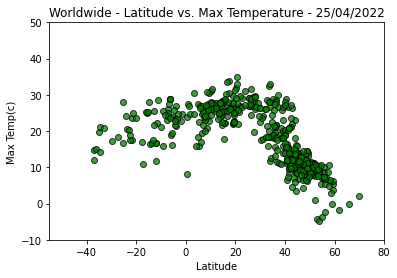

In [91]:
# Generate the plot
plt.scatter(weather_data["Latitude"], weather_data["Max Temp(c)"], marker="o", facecolors="green", edgecolors="black", alpha=0.75)

# Setting Plot Labels and formatting
plt.xlabel("Latitude")
plt.ylabel("Max Temp(c)")
plt.title(f"Worldwide - Latitude vs. Max Temperature - {Date}")
plt.ylim(-10, 50)
plt.xlim(-55, 80)
plt.savefig("Images/Worldwide - Latitude vs Max Temperature.png");


## Latitude vs. Humidity Plot

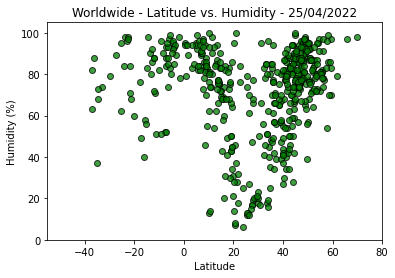

In [79]:
# Generate the plot
plt.scatter(weather_data["Latitude"], weather_data["Humidity (%)"], marker="o", facecolors="green", edgecolors="black", alpha=0.75)

# Setting Plot Labels and formatting
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Worldwide - Latitude vs. Humidity - {Date}")
plt.ylim(0, 105)
plt.xlim(-55, 80)
plt.savefig("Images/Worldwide - Latitude vs Humidity.png");

## Latitude vs. Cloudiness Plot

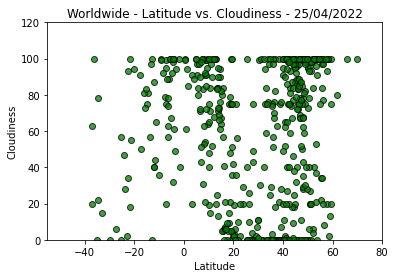

In [80]:
# Generate the plot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o", facecolors="green", edgecolors="black", alpha=0.75)

# Setting Plot Labels and formatting
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Worldwide - Latitude vs. Cloudiness - {Date}")
plt.ylim(0, 120)
plt.xlim(-55, 80)
plt.savefig("Images/Worldwide - Latitude vs Cloudiness.png");

## Latitude vs. Wind Speed Plot

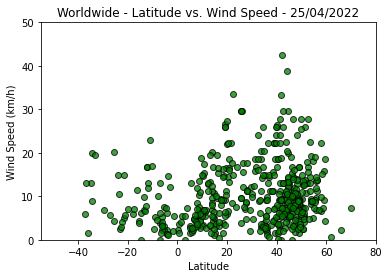

In [81]:
# Generate the plot
plt.scatter(weather_data["Latitude"], weather_data["Windspeed (km/h)"], marker="o", facecolors="green", edgecolors="black", alpha=0.75)

# # Setting Plot Labels and formatting
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.title(f"Worldwide - Latitude vs. Wind Speed - {Date}")
plt.ylim(0, 50)
plt.xlim(-55, 80)
plt.savefig("Images/Worldwide - Latitude vs Wind Speed.png");

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\Nino\anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Nino\anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


The correlation coefficient ('r' value) between Latitude and Max Temp in the Northern Hemisphere is -0.8


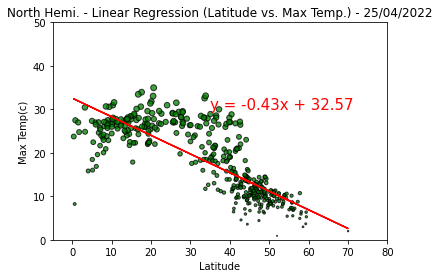

In [82]:
# Create new DF filtering only Northern Hemisphere data
north_hemi_data = weather_data[weather_data["Latitude"] >0].dropna()
north_hemi_data

# Calculate the linear regression
x_values = north_hemi_data["Latitude"]
y_values = north_hemi_data["Max Temp(c)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=north_hemi_data["Max Temp(c)"], alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temp(c)")
plt.ylim(0, 50)
plt.xlim(-5, 80)
plt.annotate(line_eq,(35,30),fontsize=15,color="red")
plt.title(f"North Hemi. - Linear Regression (Latitude vs. Max Temp.) - {Date}")
plt.savefig("Images/Northern Hemisphere - Linear Regression (Latitude vs Max Temp).png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient ('r' value) between Latitude and Max Temp in the Northern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

This graph is clearly showing that there is a negative correlation when comparing the temperature and latitude in the Northern hemisphere. The further north you go from the equator, the lower the overall temperature becomes. This can be ascertained by the correlation coeddieient (r value) being -0.8, which indicates a strong correlation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient ('r' value) between Latitude and Max Temp in the Southern Hemisphere is 0.47


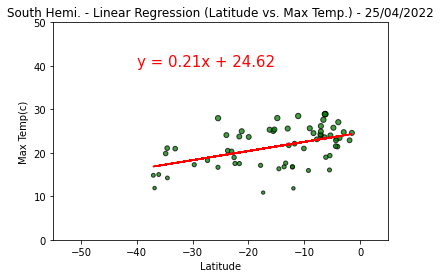

In [83]:
# Create new DF filtering only Northern Hemisphere data
south_hemi_data = weather_data[weather_data["Latitude"] <0].dropna()
south_hemi_data

# Calculate the linear regression
x_values = south_hemi_data["Latitude"]
y_values = south_hemi_data["Max Temp(c)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=south_hemi_data["Max Temp(c)"], alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temp(c)")
plt.ylim(0, 50)
plt.xlim(-55, 5)
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title(f"South Hemi. - Linear Regression (Latitude vs. Max Temp.) - {Date}")
plt.savefig("Images/Southern Hemisphere - Linear Regression (Latitude vs Max Temp).png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient ('r' value) between Latitude and Max Temp in the Southern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")


This graph is showing that there is a positive correlation when comparing the temperature and latitude in the Southern hemisphere. The further South you go from the equator, the lower the overall temperature becomes. It should be noted that from the overall data, when run on the 25/04/2022 (this will change each run) only 12% of cities were in the Southern hemisphere. In addition, geographically, there are not a large number of cities far south (when compared to the Northern hemisphere. 

The correlation can be ascertained by the correlation coeddieient (r value) being 0.47 which indicates a weak correlation. However, we could still correlate that if there was more data with further Southern cities, that the correlation will be greater.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient ('r' value) between Latitude and Humidity in the Northern Hemisphere is 0.17


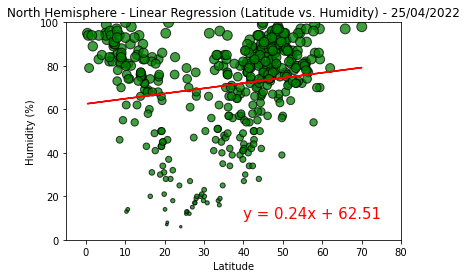

In [84]:
# Create new DF filtering only Northern Hemisphere data
north_hemi_data = weather_data[weather_data["Latitude"] >0].dropna()
north_hemi_data

# Calculate the linear regression
x_values = north_hemi_data["Latitude"]
y_values = north_hemi_data["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=north_hemi_data["Humidity (%)"], alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 100)
plt.xlim(-5, 80)
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title(f"North Hemisphere - Linear Regression (Latitude vs. Humidity) - {Date}")
plt.savefig("Images/Northern Hemisphere - Linear Regression (Latitude vs Humidity).png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient ('r' value) between Latitude and Humidity in the Northern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

This graph is showing that there is very weak correlation between Humidity and Latitude in the Northern hemisphere. This correlation is ascertained by the correlation coeddieient (r value) being 0.17 which indicates a positive, weak correlation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient ('r' value) between Latitude and Humidity in the Southern Hemisphere is 0.27


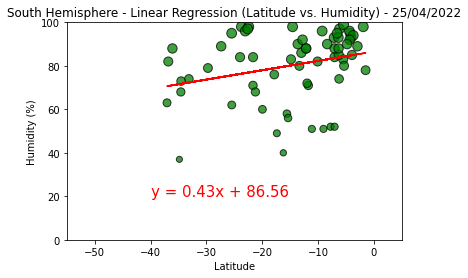

In [85]:
# Create new DF filtering only Northern Hemisphere data
south_hemi_data = weather_data[weather_data["Latitude"] <0].dropna()
south_hemi_data

# Calculate the linear regression
x_values = south_hemi_data["Latitude"]
y_values = south_hemi_data["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=south_hemi_data["Humidity (%)"], alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 100)
plt.xlim(-55, 5)
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title(f"South Hemisphere - Linear Regression (Latitude vs. Humidity) - {Date}")
plt.savefig("Images/Southern Hemisphere - Linear Regression (Latitude vs Humidity).png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient ('r' value) between Latitude and Humidity in the Southern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

This graph is showing that there is very weak correlation between Humidity and Latitude in the Southern hemisphere. This correlation is ascertained by the correlation coeddieient (r value) being 0.27 which indicates a positive, weak correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient ('r' value) between Latitude and Cloudiness in the Northern Hemisphere is 0.07


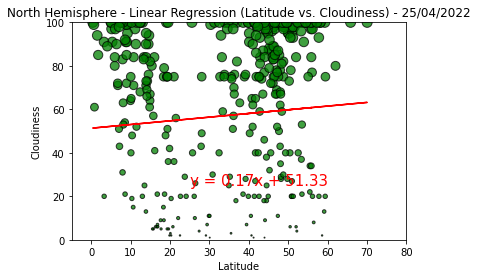

In [86]:
# Create new DF filtering only Northern Hemisphere data
north_hemi_data = weather_data[weather_data["Latitude"] >0].dropna()
north_hemi_data

# Calculate the linear regression
x_values = north_hemi_data["Latitude"]
y_values = north_hemi_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=north_hemi_data["Cloudiness"], alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(0, 100)
plt.xlim(-5, 80)
plt.annotate(line_eq,(25,25),fontsize=15,color="red")
plt.title(f"North Hemisphere - Linear Regression (Latitude vs. Cloudiness) - {Date}")
plt.savefig("Images/Northern Hemisphere - Linear Regression (Latitude vs Cloudiness).png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient ('r' value) between Latitude and Cloudiness in the Northern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

This graph is showing that there is very weak correlation between Cloudiness and Latitude in the Northern hemisphere. This correlation is ascertained by the correlation coeddieient (r value) being 0.07 which indicates a positive, but very weak correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient ('r' value) between Latitude and Cloudiness in the Southern Hemisphere is 0.46


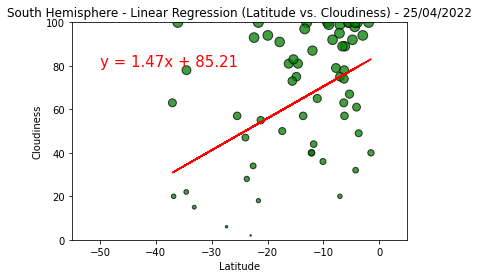

In [87]:
# Create new DF filtering only Northern Hemisphere data
south_hemi_data = weather_data[weather_data["Latitude"] <0].dropna()
south_hemi_data

# Calculate the linear regression
x_values = south_hemi_data["Latitude"]
y_values = south_hemi_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=south_hemi_data["Cloudiness"], alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(0, 100)
plt.xlim(-55, 5)
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.title(f"South Hemisphere - Linear Regression (Latitude vs. Cloudiness) - {Date}")
plt.savefig("Images/Southern Hemisphere - Linear Regression (Latitude vs Cloudiness).png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient ('r' value) between Latitude and Cloudiness in the Southern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

This graph is showing that there is a weak correlation between Cloudiness and Latitude in the Southern hemisphere. This correlation is ascertained by the correlation coeddieient (r value) being 0.46 which indicates a positive, but interestingly, shows a weak/moderate correlation. As per points above, I am not so sure the actual correlation is truly reflected in the data shown here. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient ('r' value) between Latitude and Wind Speed in the Northern Hemisphere is 0.13


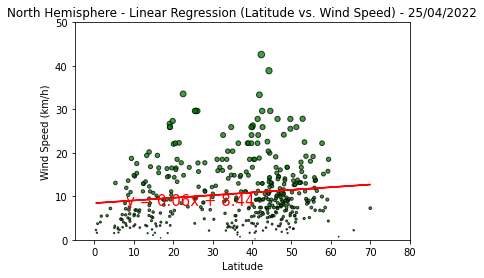

In [88]:
# Create new DF filtering only Northern Hemisphere data
north_hemi_data = weather_data[weather_data["Latitude"] >0].dropna()
north_hemi_data

# Calculate the linear regression
x_values = north_hemi_data["Latitude"]
y_values = north_hemi_data["Windspeed (km/h)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=north_hemi_data["Windspeed (km/h)"], alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.ylim(0, 50)
plt.xlim(-5, 80)
plt.annotate(line_eq,(8, 8),fontsize=15,color="red")
plt.title(f"North Hemisphere - Linear Regression (Latitude vs. Wind Speed) - {Date}")
plt.savefig("Images/Northern Hemisphere - Linear Regression (Latitude vs Wind Speed).png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient ('r' value) between Latitude and Wind Speed in the Northern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

This graph is showing that there is a weak correlation between Wind speed and Latitude in the Northern hemisphere. This correlation is ascertained by the correlation coeddieient (r value) being 0.13 which indicates a positive, but  very weak correlation. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient ('r' value) between Latitude and Wind Speed in the Southern Hemisphere is -0.3


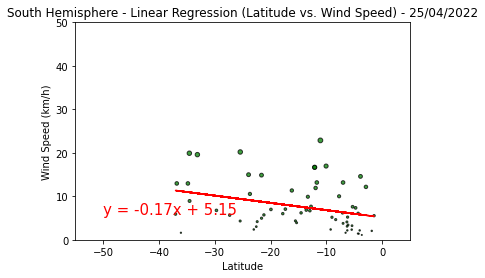

In [89]:
# Create new DF filtering only Northern Hemisphere data
south_hemi_data = weather_data[weather_data["Latitude"] <0].dropna()
south_hemi_data

# Calculate the linear regression
x_values = south_hemi_data["Latitude"]
y_values = south_hemi_data["Windspeed (km/h)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=south_hemi_data["Windspeed (km/h)"], alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.ylim(0, 50)
plt.xlim(-55, 5)
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
plt.title(f"South Hemisphere - Linear Regression (Latitude vs. Wind Speed) - {Date}")
plt.savefig("Images/Southern Hemisphere - Linear Regression (Latitude vs Wind Speed).png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient ('r' value) between Latitude and Wind Speed in the Southern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

This graph is showing that there is a weak negative correlation between Wind speed and Latitude in the Southern hemisphere. This correlation is ascertained by the correlation coeddieient (r value) being -0.3 which indicates a positive, but  very weak correlation.